In [1]:
#%matplotlib qt
%load_ext zipline

Entering Forex bundle.  tuSymbols= ('EURUSD1',)
about to return ingest function
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0
------------------------------------------
1.0


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


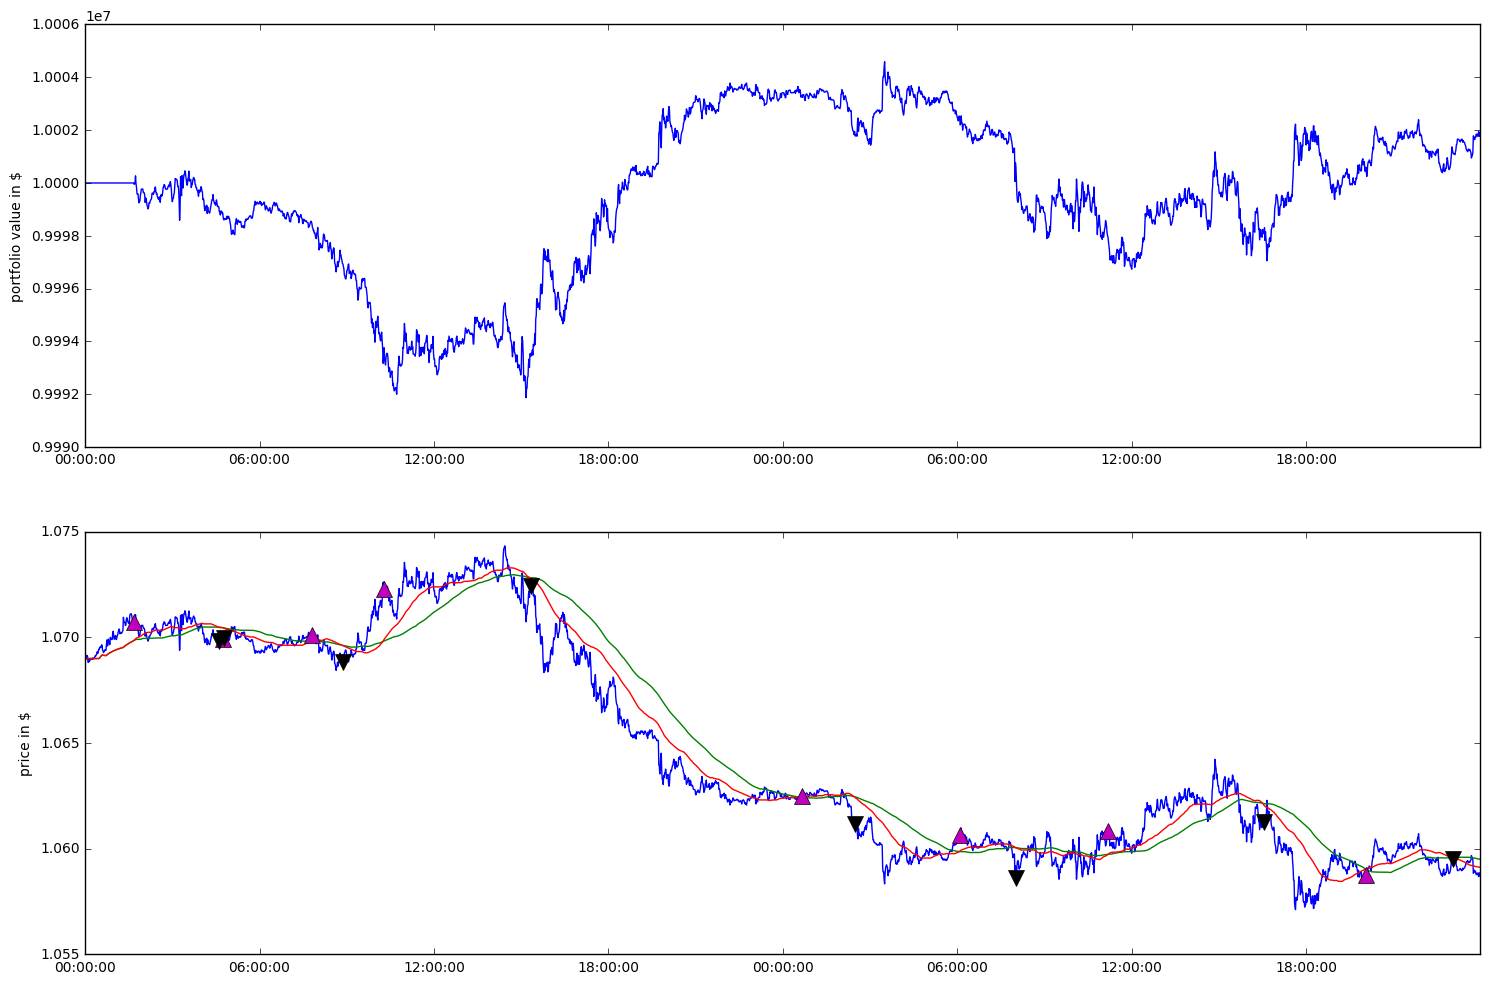

,EURUSD1,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-12-17 00:00:00+00:00,1.06897,0.000000,0.000000,0.000000e+00,-0.015238,1.710482e-01,0.000000e+00,0.0,10000000.0,0.0,...,1.06900,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224
2015-12-17 00:01:00+00:00,1.06897,0.000000,0.000000,0.000000e+00,-0.030244,3.394900e-01,0.000000e+00,0.0,10000000.0,0.0,...,1.06900,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224
2015-12-17 00:02:00+00:00,1.06897,0.000000,0.000000,0.000000e+00,-0.045021,5.053650e-01,0.000000e+00,0.0,10000000.0,0.0,...,1.06900,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224
2015-12-17 00:03:00+00:00,1.06914,0.000000,0.000000,0.000000e+00,-0.059574,6.687124e-01,0.000000e+00,0.0,10000000.0,0.0,...,1.06900,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224
2015-12-17 00:04:00+00:00,1.06915,0.000000,0.000000,0.000000e+00,-0.073904,8.295706e-01,0.000000e+00,0.0,10000000.0,0.0,...,1.06900,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224
2015-12-17 00:05:00+00:00,1.06910,0.000000,0.000000,0.000000e+00,-0.088016,9.879777e-01,0.000000e+00,0.0,10000000.0,0.0,...,1.06900,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224
2015-12-17 00:06:00+00:00,1.06882,0.000000,0.000000,0.000000e+00,-0.101913,1.143971e+00,0.000000e+00,0.0,10000000.0,0.0,...,1.06900,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224
2015-12-17 00:07:00+00:00,1.06882,0.000000,0.000000,0.000000e+00,-0.115598,1.297587e+00,0.000000e+00,0.0,10000000.0,0.0,...,1.06900,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224
2015-12-17 00:08:00+00:00,1.06894,0.000000,0.000000,0.000000e+00,-0.129075,1.448862e+00,0.000000e+00,0.0,10000000.0,0.0,...,1.06900,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224
2015-12-17 00:09:00+00:00,1.06887,0.000000,0.000000,0.000000e+00,-0.142346,1.597833e+00,0.000000e+00,0.0,10000000.0,0.0,...,1.06900,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224


In [2]:
%%zipline --start 2015-12-17 --end 2015-12-18 --bundle forex --data-frequency minute --capital-base 10000000.0

from zipline.api import symbol, record, order, order_target, order_target_value
from zipline.utils.calendars import get_calendar

import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('EURUSD1')
    
    pass

def handle_data(context, data):
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1m").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=200, frequency="1m").mean()
    
    # Trading logic
    if short_mavg > long_mavg:  
        order_target(context.asset, 1000000) # order_target orders as many shares as needed to achieve the desired number of shares.
    elif short_mavg < long_mavg:
        order_target(context.asset, -1000000)   
        
    # Save values for later inspection
    record(EURUSD1=data.current(context.asset, 'price'), short_mavg=short_mavg, long_mavg=long_mavg)
    
def analyze(context, perf):    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(211)    
    ax1.plot(perf.portfolio_value.index, perf.portfolio_value.values)
    
    ax1.set_ylabel('portfolio value in $')    
    ax2 = fig.add_subplot(212)    
    
    ax2.plot(perf.EURUSD1.index, perf.EURUSD1.values)
    ax2.plot(perf.long_mavg.index, perf.long_mavg.values)
    ax2.plot(perf.short_mavg.index, perf.short_mavg.values)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    
    #print "===================================="
    #last_value = 0
    #for i in range(len(perf.transactions)):
    #    p = perf.transactions[i]
    #    if p != []:
    #        print "------------------------------------"
    #        print p
    #        print (perf.portfolio_value.values[i-1])
    #        print '%s %s'%(perf.portfolio_value.values[i], perf.portfolio_value.values[i-1] - perf.portfolio_value.values[i])
    #        print '%s %s'%(perf.portfolio_value.values[i+1], perf.portfolio_value.values[i-1] - last_value)
    #        last_value = perf.portfolio_value.values[i]
    
    buys  = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    
    ax2.plot(buys.index.values,  perf.EURUSD1.ix[buys.index].values, '^', markersize=11, color='m')
    ax2.plot(sells.index.values, perf.EURUSD1.ix[sells.index].values,'v', markersize=11, color='k')
    
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    
    plt.gcf().set_size_inches(18, 12)
    plt.legend(loc=0)
    plt.show()
    pass